Epoch 1/10


C:\Python310\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5531 - loss: 0.6920 - val_accuracy: 0.7182 - val_loss: 0.6838
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7065 - loss: 0.6785 - val_accuracy: 0.7328 - val_loss: 0.6550
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7111 - loss: 0.6454 - val_accuracy: 0.7772 - val_loss: 0.6029
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7847 - loss: 0.5852 - val_accuracy: 0.7962 - val_loss: 0.5337
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8244 - loss: 0.5110 - val_accuracy: 0.8080 - val_loss: 0.4716
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8322 - loss: 0.4475 - val_accuracy: 0.8354 - val_loss: 0.4196
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8524 - loss: 0.3938 - val_accuracy: 0.8460 - val_loss: 0.3853
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8725 - loss: 0.3524 - val_accuracy: 0.8568 - val_loss: 0.3615


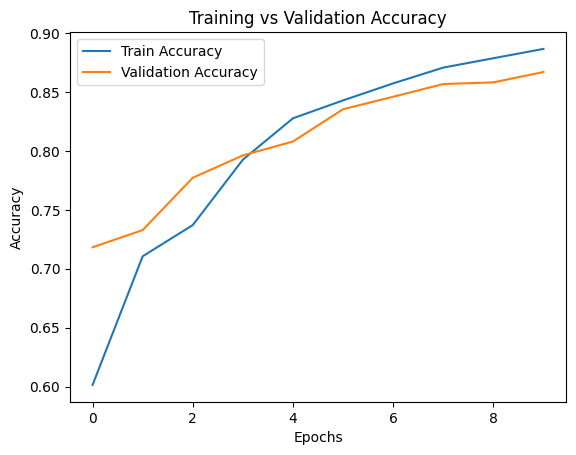

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

# Load dataset (top 10,000 most frequent words)
vocab_size = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

# Pad sequences to ensure equal input length
max_len = 200
x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)

# Build the model
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=16, input_length=max_len),
    GlobalAveragePooling1D(),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=512, validation_split=0.2, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f"\nTest Accuracy: {accuracy * 100:.2f}%")

# Plot training vs. validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.show()
